# Data Analysis & Visualization

# WeRateDogs Project By Dana

**WeRateDogs is a twitter account which rates dogs out of 10, however, the numerators could be 10,12,13,14...etc since it is a humerous account and this account has more than 8 million followers**

**twitter archive file provided by udacity contains basic tweet data (tweet ID, timestamp, text, etc.)**

**In the previous data wrangling efforts, data were gathered, assessed, cleaned and finally combined in one master document to be used in data analysis and visualization.**

**These are the questions that i will attempt to answer through data visualization**

- which is the most likes dog class?
- which is the most retweeted dog class?
- what is the relationship between retweets and favorites? 
- what is the most popular dog breed? based on frequency 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
master = pd.read_csv('twitter_archive_master.csv')

In [3]:
master.head()

,Unnamed: 0,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_class,jpg_url,img_num,dog_breed,confidence,favorite_count,retweet_count,user
0,0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,NaN,39467.0,8853.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,NaN,33819.0,6514.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,25461.0,4328.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,NaN,NaN,NaN,NaN,42908.0,8964.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,41048.0,9774.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Overview on the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f776677b2e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f77667f4710>]], dtype=object)

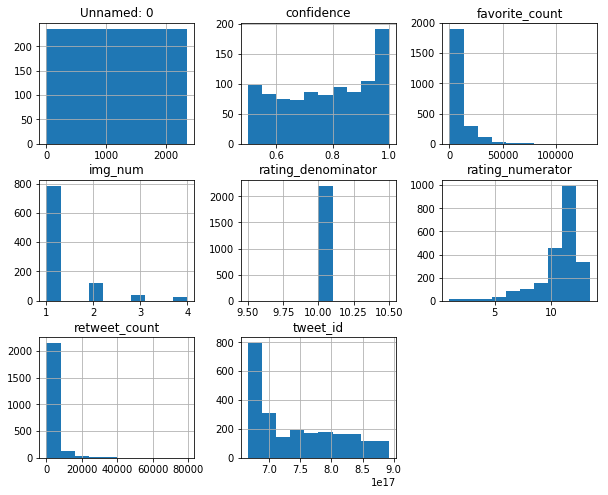

In [5]:
master.hist(figsize=(10,8))

## Analysis over rating values 

**Out of the first 15 most occuring ratings, Most rating range between [10-13]**

Text(0,0.5,'Frequency')

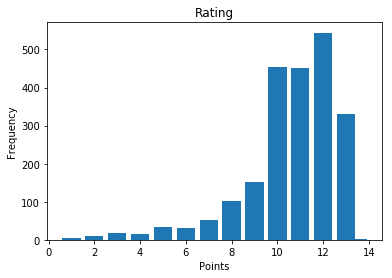

In [6]:
#fig, ax = plt.subplots()
# plot histogram
#ax.hist(FinalDF['rating_numerator'].mean())
# set title and labels
#ax.set_title('Rating')
#ax.set_xlabel('Points')
#ax.set_ylabel('Frequency')
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = master['rating_numerator'].value_counts().head(15)
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Rating') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

## Disterbution of dog classes

**we find out that Most mentioned is Pupper then doggo then puppo**

Text(0.5,1,'The Distribution of Dog classes')

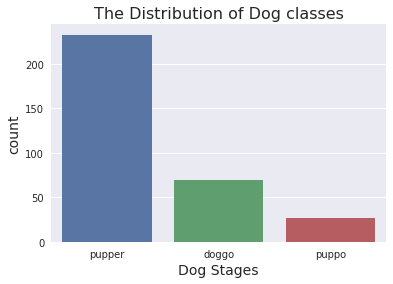

In [7]:
SS = master['dog_class'].value_counts().head(3).index
sns.set(style="darkgrid")
sns.countplot(data = master, x = 'dog_class', order = SS, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Dog Stages', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('The Distribution of Dog classes',fontsize=16)



## Relationship between retweets and favorites 

**When retweets increase the likes also increases**

Text(0.5,1,'Favorites as a Function of Retweets')

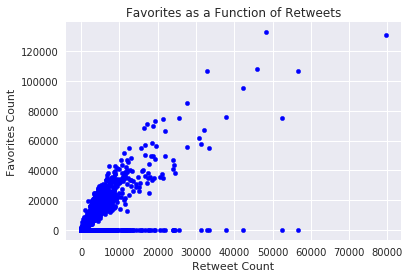

In [8]:
master.plot(x= 'retweet_count', y = 'favorite_count', kind='scatter', color='blue')
plt.xlabel('Retweet Count')
plt.ylabel('Favorites Count')
plt.title('Favorites as a Function of Retweets')


## Which dog classes were most rated higher than 10

**pupper is the most rated class and then doggo**

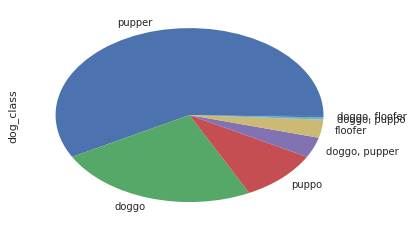

In [9]:
master[master.rating_numerator>10]['dog_class'].value_counts().plot.pie()





## dog breed disterbution 

**The most mentioned dog breed is golden retriever**

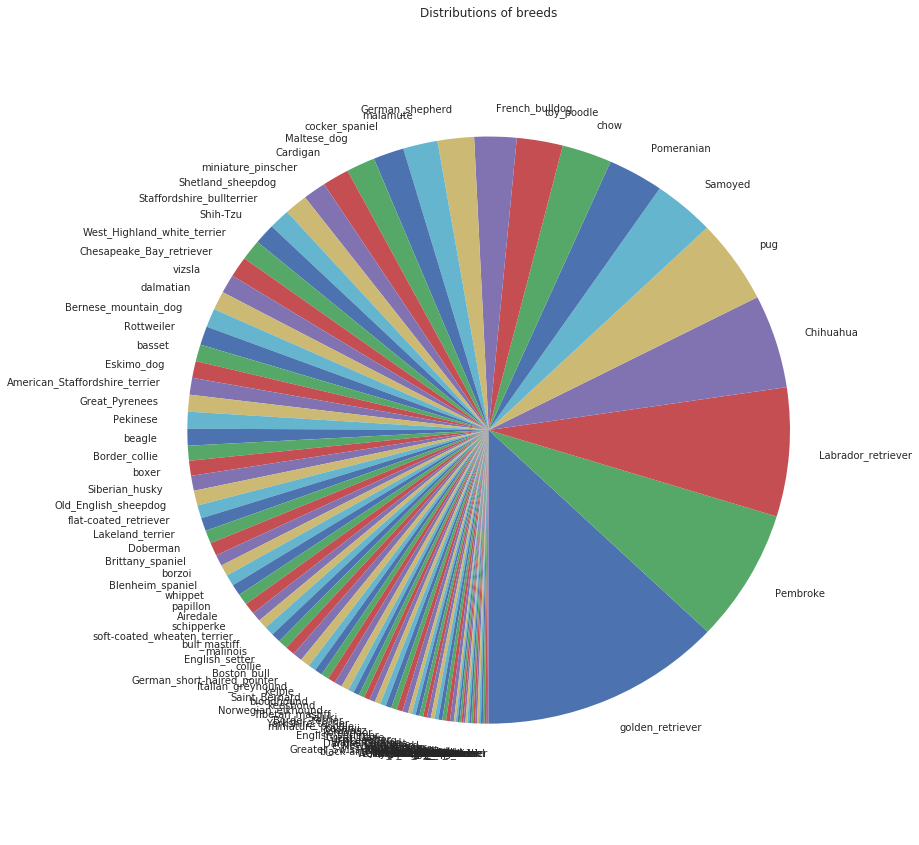

In [10]:
breed = master[pd.notnull(master.dog_breed)]
plt.rcParams['figure.figsize']=(15,15)
breed.dog_breed.value_counts(sort=True).plot.pie(startangle=270, pctdistance=0.8, radius = 0.9)
plt.title('Distributions of breeds')
plt.ylabel('')
plt.show();


**Most favorited dog class is pupper**

In [11]:
master.groupby('dog_class')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_class,,,,,,,,
doggo,70.0,14906.571429,19277.459000,0.0,5301.00,10117.0,15308.0,131075.0
"doggo, floofer",1.0,17169.000000,NaN,17169.0,17169.00,17169.0,17169.0,17169.0
"doggo, pupper",11.0,10339.272727,12023.773868,0.0,5734.50,8735.0,10021.5,44619.0
"doggo, puppo",1.0,47844.000000,NaN,47844.0,47844.00,47844.0,47844.0,47844.0
floofer,9.0,11064.444444,10680.460853,1618.0,4015.00,6076.0,12456.0,33345.0
pupper,232.0,6075.133621,9578.651616,0.0,2112.75,3094.0,6443.0,106827.0
puppo,27.0,16329.851852,25477.134025,0.0,5099.50,10132.0,19038.5,132810.0


**most retweeted dog class is also pupper**

In [12]:
master.groupby('dog_class')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_class,,,,,,,,
doggo,70.0,6657.442857,12632.759627,725.0,1986.5,3227.5,5133.0,79515.0
"doggo, floofer",1.0,3433.000000,NaN,3433.0,3433.0,3433.0,3433.0,3433.0
"doggo, pupper",11.0,5389.090909,6080.706299,1265.0,2477.0,2961.0,3520.0,17621.0
"doggo, puppo",1.0,19196.000000,NaN,19196.0,19196.0,19196.0,19196.0,19196.0
floofer,9.0,4155.888889,5590.254566,496.0,1141.0,2509.0,3825.0,18497.0
pupper,232.0,2704.418103,4296.952816,26.0,706.5,1271.0,3129.0,32883.0
puppo,27.0,5866.296296,9024.846015,716.0,1593.5,3220.0,7541.5,48265.0
